# Chapter 02
Housing price prediction project

# Metodología:
### En el appendix B del libro hay una checklist para los proyectos de ML que puede ser MUY útill.

## ¿Cuál es el objetivo del proyecto?
Poder predecir el precio medio de las casas en un determinado distrito. 

## ¿Qué métrica se va a usar?
RMSE

# Ahora si, a codear!

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing_df = pd.read_csv("../datasets/housing/housing.csv")
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_df.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN         1
-118.19    34.12     35.0                2524.0       749.0           2487.0      679.0       2.4932         167700.0            <1H OCEAN          1
           34.13     52.0                2012.0       458.0           1314.0      434.0       3.9250         180400.0            <1H OCEAN          1
                     50.0                1309.0       302.0           883.0       293.0       3.1287         198000.0            <1H OCEAN          1
           34.12     52.0                679.0        132.0           483.0       163.0       4.2344         162500.0            <1H OCEAN          1
                                                                                                         

In [6]:
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

OK... value_counts() está buenísimo para pd.Series. Para DataFrames es prácticamente lo mismo. 

# Estadística descriptiva:

In [7]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Gráficos:

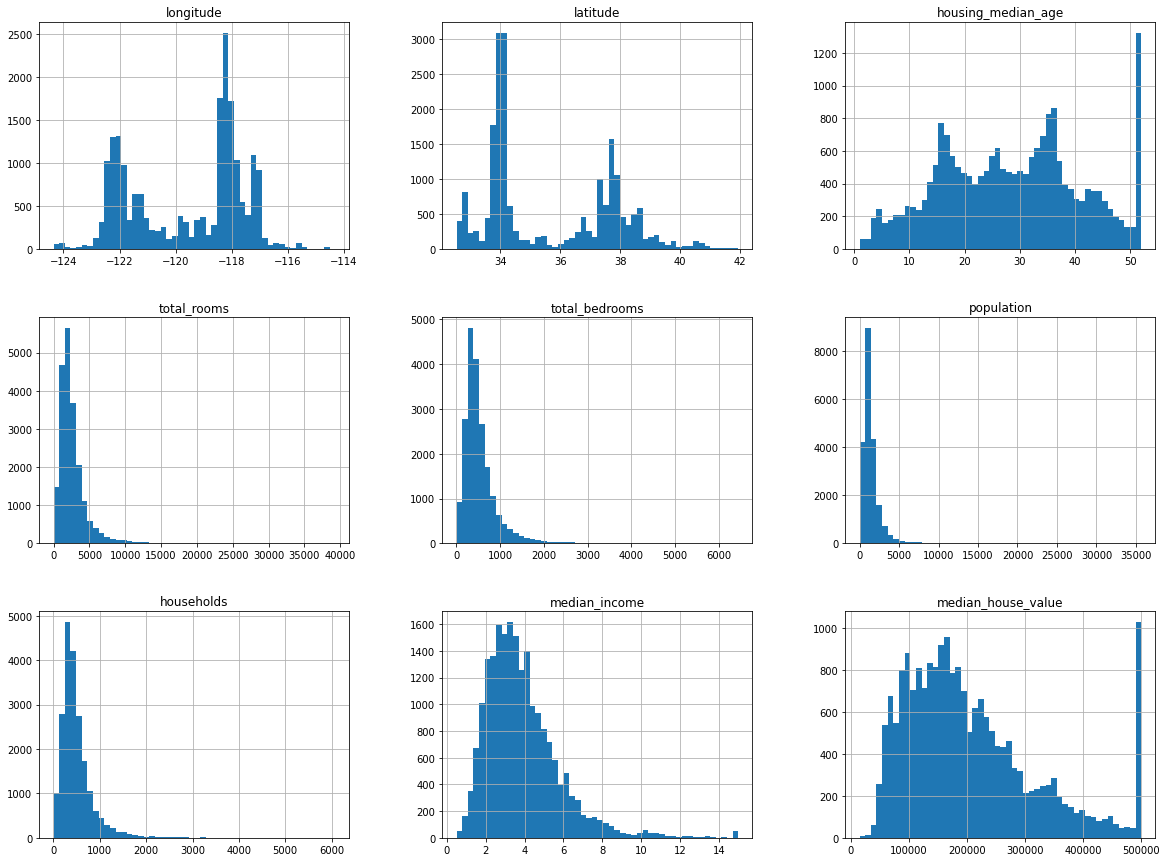

In [10]:
housing_df.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot:>

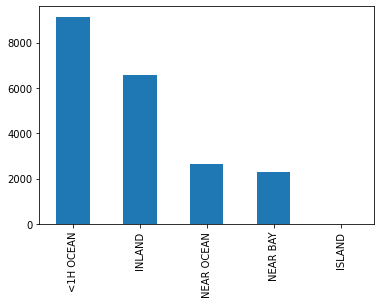

In [20]:
housing_df["ocean_proximity"].value_counts().plot(kind="bar")

Este fue un primer approach a la data... Para ver cómo es solamente.

# TEST SET.
### Esto es importantísimo! Antes de seguir mirando la data, tengo que armar un _test set_. El _test set_ NO es parte del loop de desarrollo iterativo para el modelo. 
### El test set se crea y no se toca hasta el final. Sirve únicamente a modo de estimación de qué tan bien va a performar el modelo en la vida real. (y para que si tu modelo es una verga, te des cuenta antes de pushearlo al ambiente productivo)

## Una buena idea es hacer un Stratified Split. La idea es que la distribución del test set sea lo más parecida posible a la distribución del dataset completo. 
#### Si tu dataset es muy grande, esto se hace casi autmáticamente haciendo random sampling (due to the law of large numbers). Pero, si el dataset es pequeño, vamos a tener que hacer un stratified samplig para evitar el sesgo de muestreo (sampling bias)

In [21]:
# Import Stratified Split class
from sklearn.model_selection import StratifiedShuffleSplit

Primero, voy a usar la función cut() de pandas para crear una variable categórica en base al median income salary. 

In [22]:
housing_df["income_category"] = pd.cut(housing_df["median_income"],
                                      bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                      labels=[1, 2, 3, 4, 5])
# np.inf = Infinity. np.ninf = Negative infinity.
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


OK. Ahora separo por estrato en income_category:

In [24]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # Creo el splitter object

In [30]:
splitter.split(housing_df, housing_df["income_category"])

<generator object BaseShuffleSplit.split at 0x7fb8f6ba0580>

In [29]:
list(splitter.split(housing_df, housing_df["income_category"]))

[(array([17606, 18632, 14650, ..., 13908, 11159, 15775]),
  array([ 5241, 10970, 20351, ...,  4019, 12107,  2398]))]

In [31]:
# El split me devuelve un generator
train_index, test_index = list(splitter.split(housing_df, housing_df["income_category"]))[0]
strat_train_set = housing_df.loc[train_index]
strat_test_set = housing_df.loc[test_index]

In [33]:
strat_test_set["income_category"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [34]:
housing_df["income_category"].value_counts() / len(housing_df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_category, dtype: float64

#### Excelente! Funcionó. La distribución es la misma.

In [35]:
# Elimino la columna de income_category para volver al dataset original
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

In [37]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


Todo OK. Podemos seguir con data viz. 

# Data Viz

Primero creo una copia del dataset:

In [38]:
housing = strat_train_set.copy()

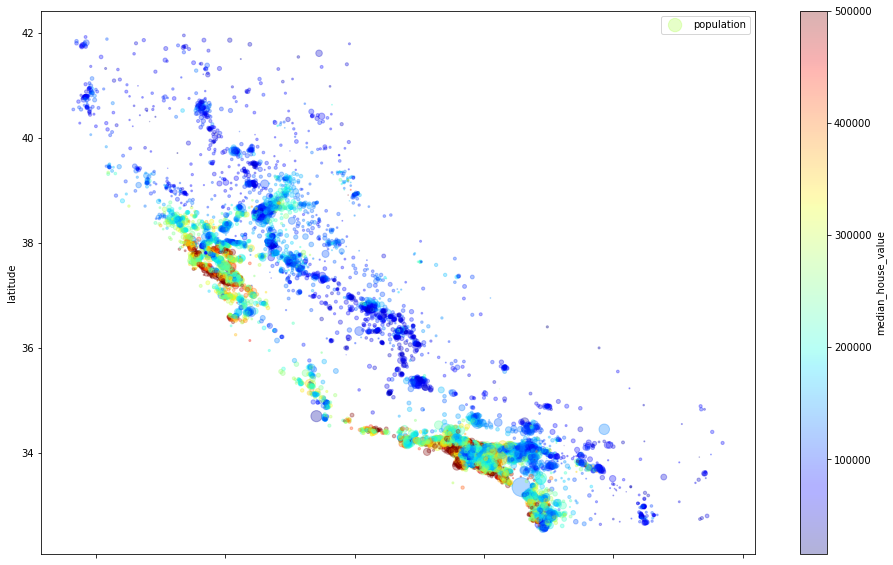

In [47]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(16,10), alpha=0.3,
            s=housing["population"] / 100, label="population", colorbar=True,
            c="median_house_value", cmap=plt.get_cmap("jet"))
plt.legend()
plt.show()

#### Con esto queda demostrado que podemos plottear con pandas sin ningún problema. Es cuestión de práctica nomás.

Parecería ser que cuanto menor es la distancia a la costa, mayor es el precio medio de las casas

### Buscando correlaciones entre features. 

In [48]:
corr_matrix = housing.corr()

In [49]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [52]:
# Miro las features que tienen mayor correlación con mi target value:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [54]:
%matplotlib inline

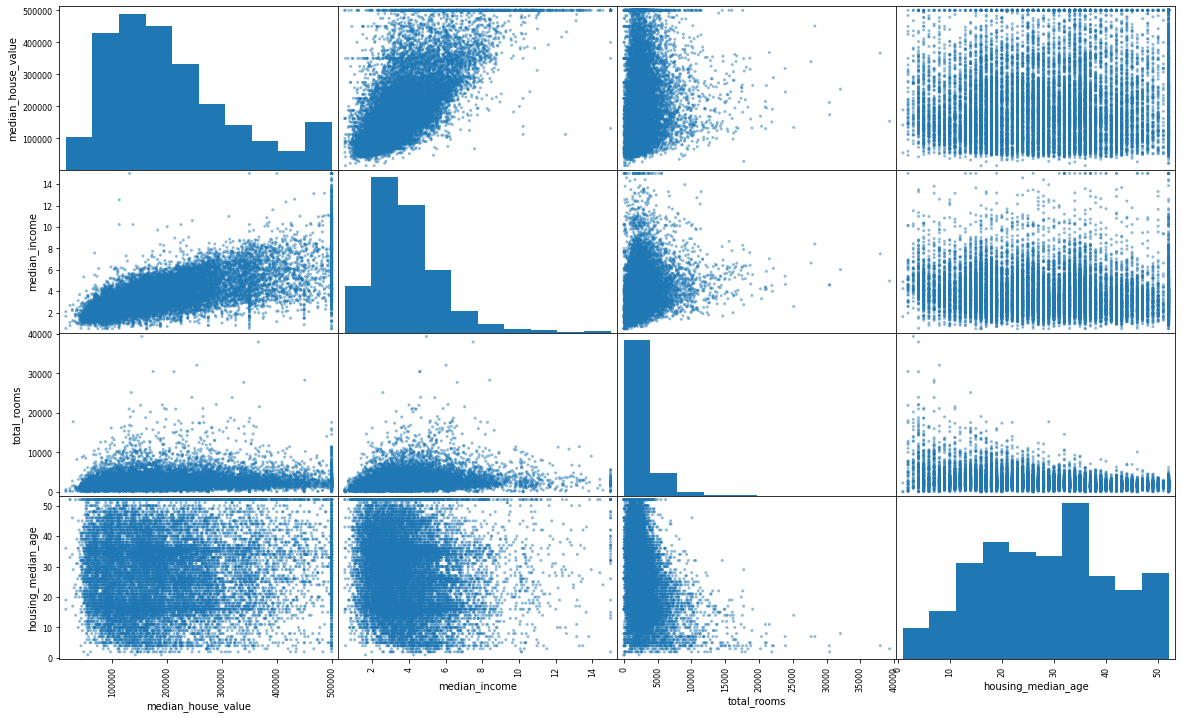

In [58]:
# Plotteo las features que me interesan en una scatter matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes], figsize=(20, 12))
plt.show()

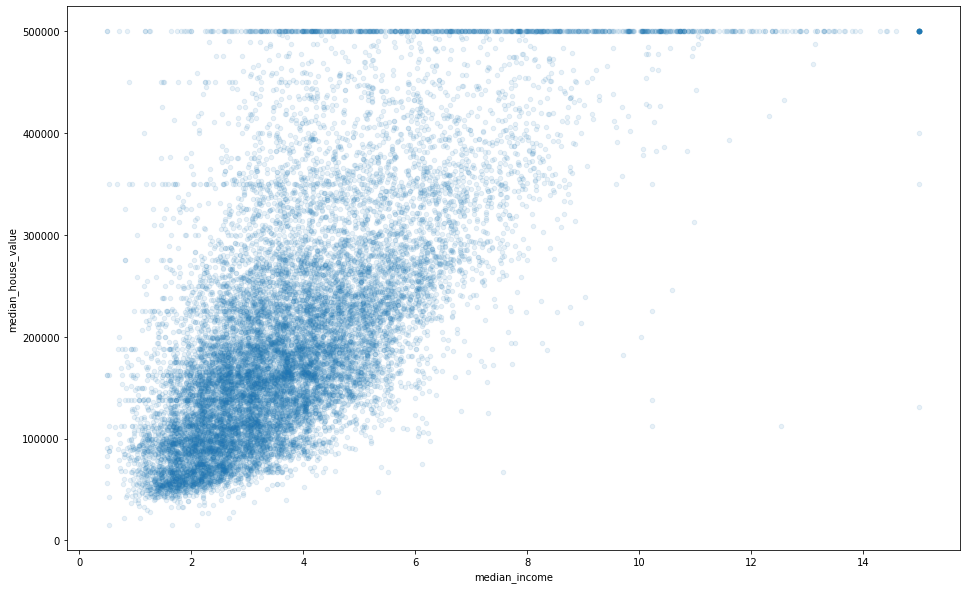

In [63]:
# Me enfoco en median income:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1, figsize=(16,10))
plt.show()

### Ahora a crear nuevas features a partir de las features actuales

In [64]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [65]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Getting data ready for the ML model

In [66]:
# Getting a fresh dataset by copying the original dataset
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data cleaning

## 1: Missing Values

In [68]:
# Hay distintas maneras de lidiar con los missing values. En este caso, vamos a ir por el simple imputer
from sklearn.impute import SimpleImputer

# Creo un dataset que tenga únicamente NUMERIC values, que es el que va a pasar por el imputer.
housing_num = housing.drop(labels="ocean_proximity", axis=1)
# Creo el Imputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [69]:
# Puedo ver los valores del imputer. La mediana que calculó para cada feature:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [70]:
X = imputer.transform(housing_num)
#Ahora creo el dataset transformado:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [72]:
housing.isna().values.any()

True

In [73]:
housing_tr.isna().values.any()

False

Bien! Ahora el dataset me quedó sin Nans.

#### Ahora vamos a la variable categórica.

In [75]:
housing_cat = housing["ocean_proximity"]
housing_cat

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: object

Por razones que se detallan en el libro, vamos a usar el One-Hot Encoder en lugar del Label Encoder

In [79]:
housing_cat.values

array(['<1H OCEAN', '<1H OCEAN', 'NEAR OCEAN', ..., 'INLAND', '<1H OCEAN',
       'NEAR BAY'], dtype=object)

In [81]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

lab_encoder = LabelEncoder()
cat_encoder = OneHotEncoder()
housing_cat_labl = lab_encoder.fit_transform(housing_cat)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_labl.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [83]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [84]:
housing_cat_labl

array([0, 0, 4, ..., 1, 0, 3])